In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\user\\Downloads\\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(columns=['Id' , 'Species'], inplace=True)

In [4]:
data.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


SepalLengthCm [<AxesSubplot:> <AxesSubplot:>]
SepalWidthCm [<AxesSubplot:> <AxesSubplot:>]


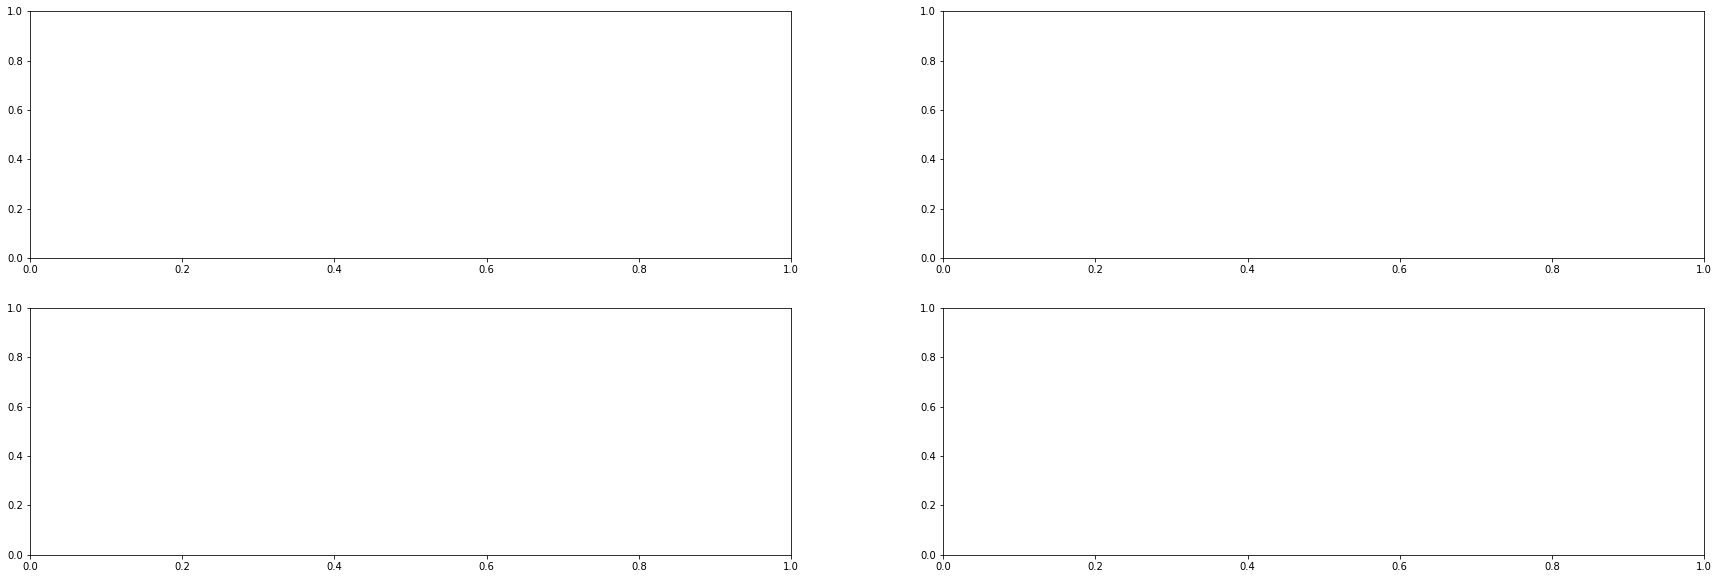

In [7]:
fig , axes = plt.subplots(2,2, figsize=(30,10))
for col, axis in zip(data.columns, axes):  #will plot each colum on each axis..but here 2 col
    print(col, axis)

SepalLengthCm AxesSubplot(0.125,0.71587;0.775x0.16413)
SepalWidthCm AxesSubplot(0.125,0.518913;0.775x0.16413)
PetalLengthCm AxesSubplot(0.125,0.321957;0.775x0.16413)
PetalWidthCm AxesSubplot(0.125,0.125;0.775x0.16413)


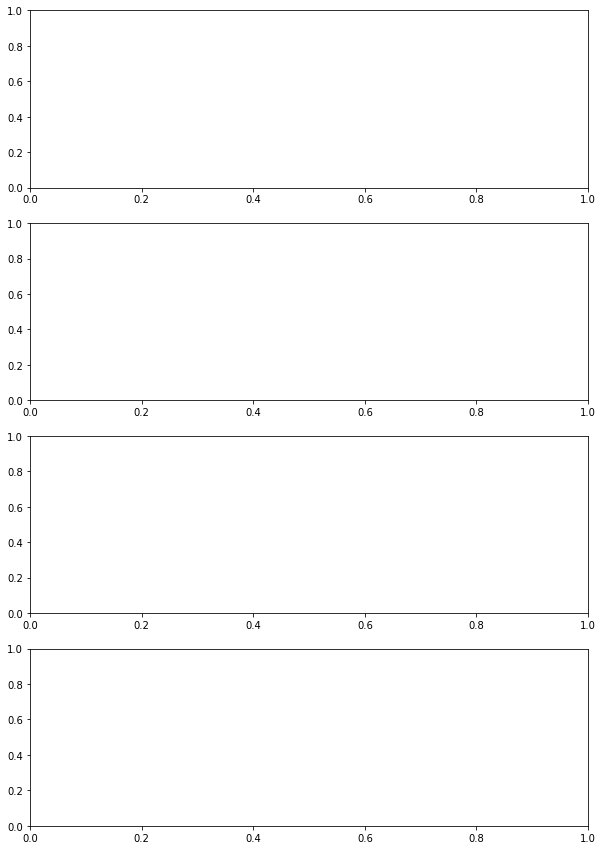

In [8]:
fig, axes = plt.subplots(4,1, figsize=(10,15)) #4,1 is like matrix
for col, axis in zip(data.columns, axes):
    print(col, axis)

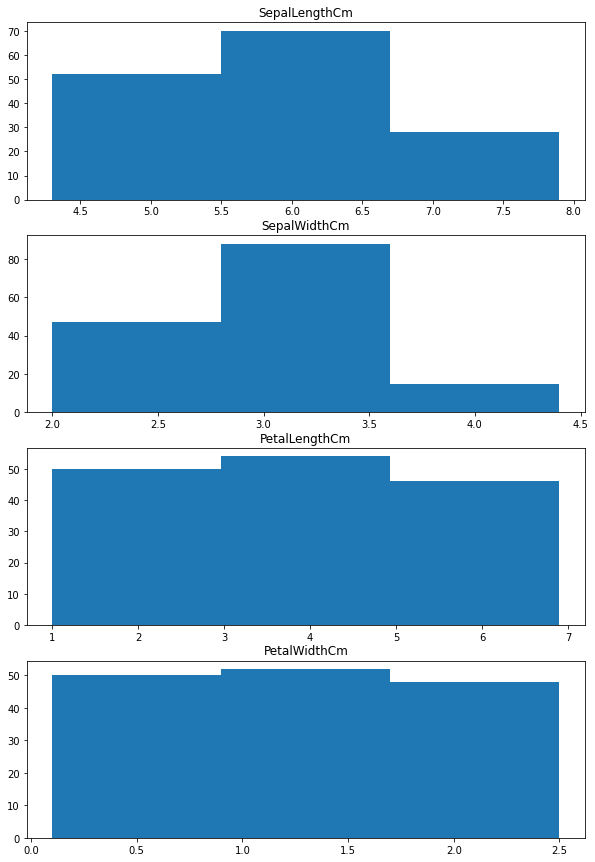

In [9]:
fig , axes = plt.subplots(4,1, figsize=(10,15))
for col , axis in zip(data.columns, axes):
    axis.hist(data[[col]], bins=3)
    axis.set_title(f'{col}')

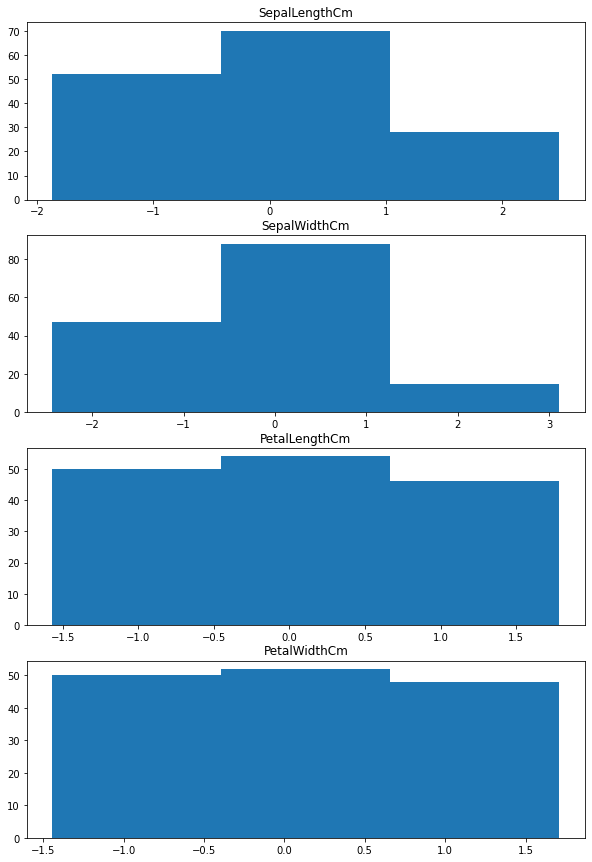

In [10]:
# Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(data)
#scaledX[:,0]  # we will scale all rows and 1st col

fig1, axes1 = plt.subplots(4,1, figsize=(10,15))
for index ,col, axis in zip(range(0,4),data.columns, axes1):   #index to show every colum in iteration
    axis.hist(scaledX[:, index], bins=3)  # in hist, the scaled rows and every colum will b shown
    axis.set_title(f'{col}')

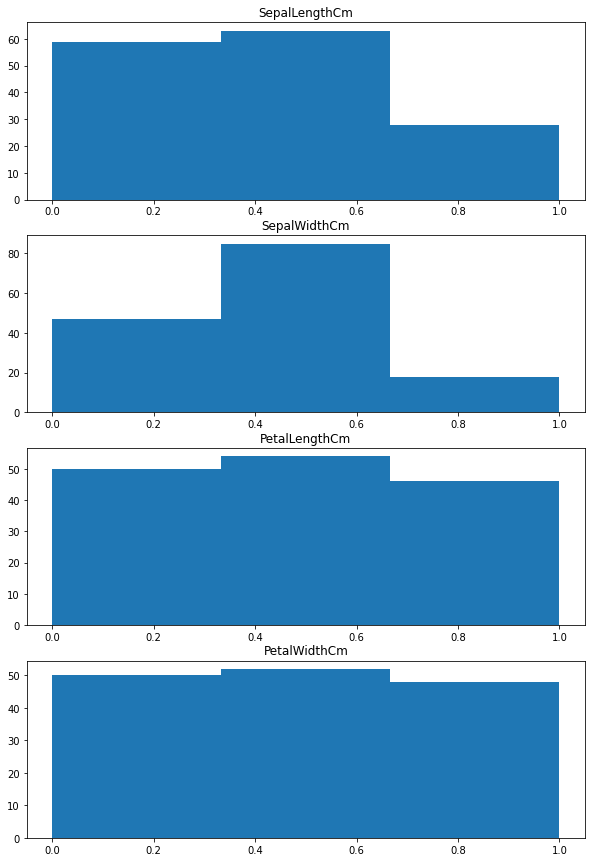

In [11]:
# here our mean was 4.0 but we got - in prev scaler...so go for minmax..it gives +, mean shud be 0

scaler = MinMaxScaler()
scaledX = scaler.fit_transform(data)

fig1, axes1 =plt.subplots(4,1, figsize=(10,15))
for index, col, axis in zip(range(0,4), data.columns, axes1):
    axis.hist(scaledX[:, index] , bins=3)
    axis.set_title(f'{col}')

In [12]:
# Splitting
from sklearn.model_selection import train_test_split

xtrain, xtest = train_test_split(scaledX, test_size=0.25, random_state =2)
xtrain.shape, xtest.shape

((112, 4), (38, 4))

In [13]:
# modelling
from sklearn.cluster import KMeans

model = KMeans()
model.fit(scaledX[:, 2:4])  # we will consider last 2 col as they dont have biased value from the hist
model.labels_, model.inertia_  # attributes(labels= no. of clusters, inertia = variance)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 7, 1, 3, 7, 7, 3, 1, 3, 1, 7, 1,
        1, 3, 1, 3, 2, 7, 1, 7, 7, 1, 1, 2, 1, 3, 3, 3, 7, 1, 1, 1, 1, 7,
        7, 7, 7, 1, 7, 3, 7, 7, 7, 7, 3, 7, 4, 2, 4, 6, 4, 5, 1, 6, 6, 4,
        2, 2, 4, 2, 4, 4, 6, 5, 5, 1, 4, 2, 5, 2, 4, 6, 2, 2, 4, 6, 6, 5,
        4, 1, 6, 4, 4, 6, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2]),
 0.4894028548646667)

Text(0, 0.5, 'PetalWidth')

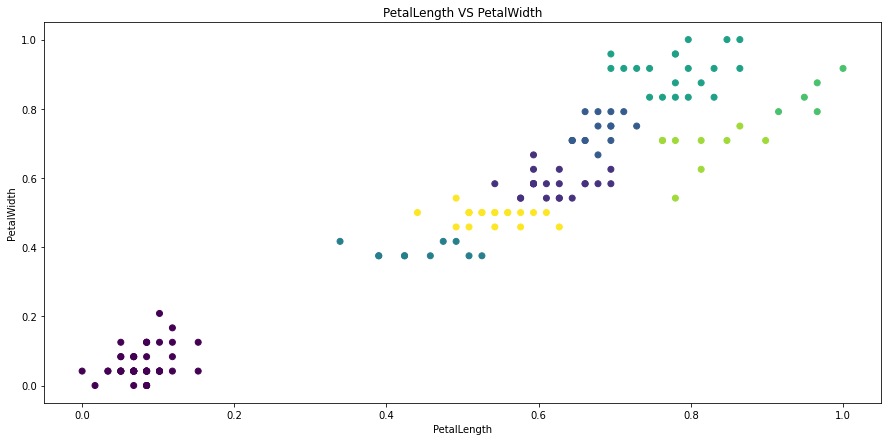

In [14]:
fig3, axes3 = plt.subplots(1,1, figsize=(15,7))
axes3.scatter(scaledX[:,2], scaledX[:,3], c = model.labels_)
axes3.set_title('PetalLength VS PetalWidth')
axes3.set_xlabel('PetalLength')
axes3.set_ylabel('PetalWidth')

Inertia For 2 => 5.179687509974783
Inertia For 3 => 1.7050986081225123
Inertia For 4 => 1.1647473293509736
Inertia For 5 => 0.8570856553216398
Inertia For 6 => 0.6827536831558554
Inertia For 7 => 0.5689016009341252
Inertia For 8 => 0.4890323753218529
Inertia For 9 => 0.4155388630360096
Inertia For 10 => 0.37144545232409437
Inertia For 11 => 0.3291807214140431
Inertia For 12 => 0.30325532566167174
Inertia For 13 => 0.2720989912314928
Inertia For 14 => 0.2518297879864463


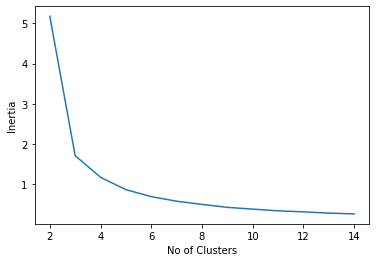

In [15]:

inertia = []
for k in range(2,15):
    Model = KMeans(n_clusters=k)
    Model.fit(scaledX[:, 2:4])
    print(f'Inertia For {k} => {Model.inertia_}')
    inertia.append(Model.inertia_)

plt.plot(list(range(2,15)), inertia)
plt.xlabel('No of Clusters')
plt.ylabel('Inertia')
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'PetalWidth')

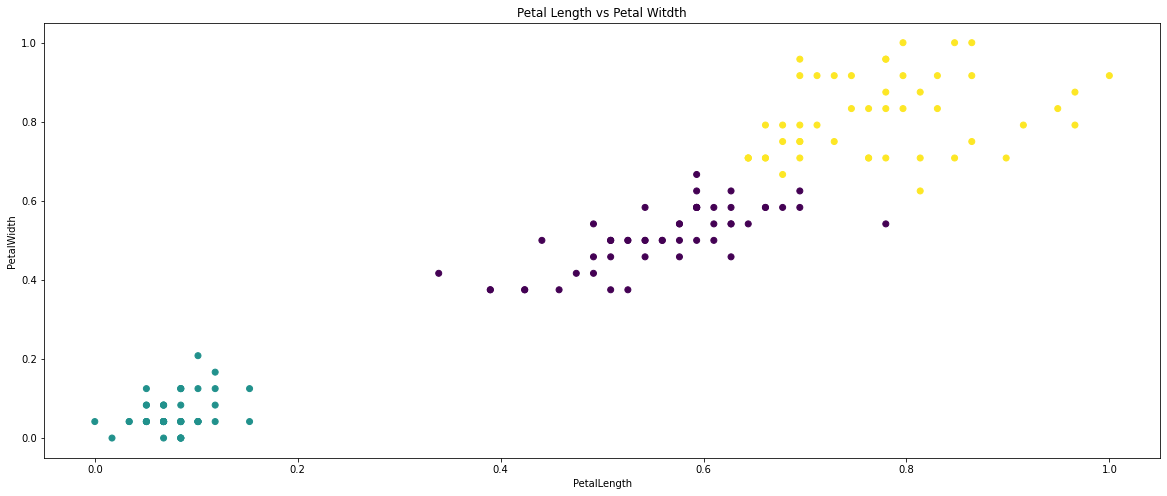

In [16]:
## Final Model
fmodel = KMeans(n_clusters=3)
fmodel.fit(xtrain[:, 2:4])
ypred = fmodel.predict(scaledX[:, 2:4])
print(ypred)
fig4, axes4 = plt.subplots(1,1, figsize=(20,8))
axes4.scatter(scaledX[:, 2], scaledX[:, 3], c=ypred)
axes4.set_title('Petal Length vs Petal Witdth')
axes4.set_xlabel('PetalLength')
axes4.set_ylabel('PetalWidth')

In [17]:
set(fmodel.labels_)

{0, 1, 2}

In [18]:
# Validation
from sklearn.metrics import silhouette_score, silhouette_samples

silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)

(0.48167082884024637,
 array([ 0.78324979,  0.70271943,  0.75593664,  0.71893392,  0.77546204,
         0.64694332,  0.74993829,  0.78590681,  0.63181484,  0.7355852 ,
         0.72233669,  0.77470221,  0.7043695 ,  0.6562191 ,  0.60101438,
         0.49924079,  0.66417302,  0.77585814,  0.62395724,  0.72644536,
         0.71892296,  0.72912864,  0.73873349,  0.68143093,  0.74612198,
         0.68574726,  0.74792817,  0.77154276,  0.77202552,  0.7471226 ,
         0.72909965,  0.69941474,  0.64859147,  0.59869375,  0.7355852 ,
         0.75873646,  0.71890558,  0.7355852 ,  0.66818773,  0.78084803,
         0.77904903,  0.37325111,  0.71244223,  0.67031327,  0.67866813,
         0.68882776,  0.72848195,  0.74412622,  0.73755296,  0.77900847,
         0.01260942,  0.19145171, -0.05910374,  0.52362036,  0.26433087,
         0.5528343 ,  0.04307928,  0.34233108,  0.3301741 ,  0.51255862,
         0.3833533 ,  0.43790301,  0.49517925,  0.42722917,  0.54417374,
         0.21376882,  0.42117

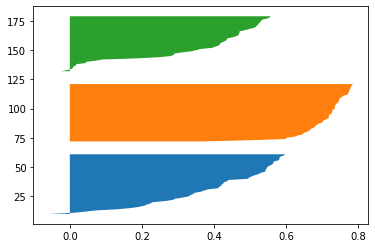

In [19]:
sScore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)
ylow = 10
for i in set(fmodel.labels_):  # set will give u 0,1,2
    isample = sSample[ypred == i]   #we will store all the silhoute score of 0,1,2 scores that match frm ssample
    isample.sort()   # we will sort
    yup = ylow + isample.shape[0]   # distance frm ylow will be the silhoute scores that matched and shape[0] means the rows
    plt.fill_betweenx(np.arange(ylow, yup), 0, isample) # it is for x axis, first it takes ranges, than the starting point, then upto where it will expand
    ylow = yup + 10  # +10 is used for the distance btwn each plots
plt.show()


In [20]:
sSample[ypred == 0]
sSample[ypred == 1]

array([0.78324979, 0.70271943, 0.75593664, 0.71893392, 0.77546204,
       0.64694332, 0.74993829, 0.78590681, 0.63181484, 0.7355852 ,
       0.72233669, 0.77470221, 0.7043695 , 0.6562191 , 0.60101438,
       0.49924079, 0.66417302, 0.77585814, 0.62395724, 0.72644536,
       0.71892296, 0.72912864, 0.73873349, 0.68143093, 0.74612198,
       0.68574726, 0.74792817, 0.77154276, 0.77202552, 0.7471226 ,
       0.72909965, 0.69941474, 0.64859147, 0.59869375, 0.7355852 ,
       0.75873646, 0.71890558, 0.7355852 , 0.66818773, 0.78084803,
       0.77904903, 0.37325111, 0.71244223, 0.67031327, 0.67866813,
       0.68882776, 0.72848195, 0.74412622, 0.73755296, 0.77900847])

ValueError: operands could not be broadcast together with shapes (0,) (100,) 

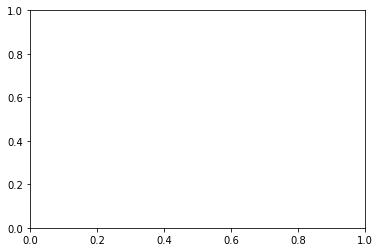

In [23]:
# for all k 
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state= 5)
    ypred = kmeans.fit_predict(scaledX)
    sScore, sSample = silhouette_score(scaledX, ypred), silhouette_samples(scaledX, ypred)

    ylow = 10
    for i in set(kmeans.labels_):
        isample = sSample[ypred == i]
        isample.sort()
        yup = ylow + isample.shape[0]
        
        plt.fill_betweenx(np.arange(ylow, yup), 0, isample)
        plt.title(f'for cluster {k} , the score is {sScore}')
        ylow = yup + 10
         # showing err on previous line
    plt.show()